# Titanic Disaster Survival Prediction using Logistic Regression

In [1]:
# import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Loading Data
titanic_data = pd.read_csv('train.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking number of columns
len(titanic_data) 

891

### 'Survived' is the target column

In [6]:
# counting empty values in each column using sum() and isna() function
titanic_data.isna().sum()
# we can see that Age has 177 empty values and Cabin has 687 empty values - So we can drop 'Cabin'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA using seaborn visualizations

In [7]:
# using countplot to determine how many passengers survived VS didnt survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

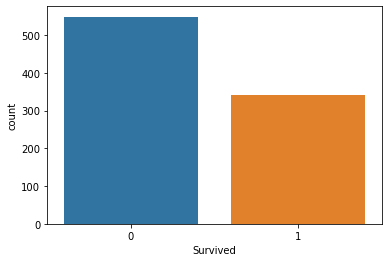

In [8]:
sns.countplot(x='Survived',data=titanic_data) # More than 500 didnt survive, and between 300 and 400 survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

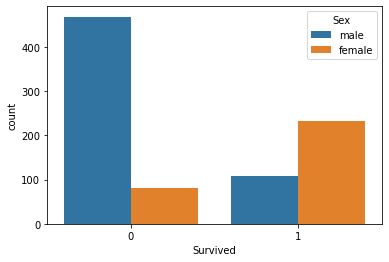

In [9]:
# checking gender wise distribution
sns.countplot(x='Survived',data=titanic_data,hue='Sex') # - more females survived

<AxesSubplot:>

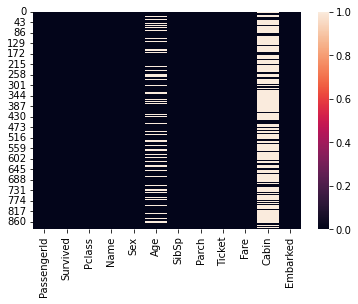

In [10]:
# visualize null values using heatmap for our convenience
sns.heatmap(titanic_data.isna())

In [11]:
# how to deal with these NULL values (do we discard or impute)? - this depends on the % of null values present in the columns
# we decide that if NULL % > 30%, we will discard it, and if not, we will impute those values
# if we try to impute the columns containing more than 30% NULL values, then our model may become overfitted
# finding NULL % in age:
((titanic_data['Age'].isna().sum())/len(titanic_data))*100 # around 20% - so we impute values in age

19.865319865319865

In [12]:
# finding NULL % in Cabin:
((titanic_data['Cabin'].isna().sum())/len(titanic_data))*100
# 77% so we discard the column

77.10437710437711

## Data Cleaning

In [13]:
# imputing age - adding values to replace NULL - we impute using mean value
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'].fillna(mean_age,inplace=True) # inplace = True is done to ensure our changes are made on the original
# Dataframe instead of a copy

In [14]:
# dropping Cabin column
titanic_data.drop('Cabin',axis=1,inplace = True) # axis = 1 for column and axis = 0 for rows

In [15]:
# Changing categorical to numerical data - for Sex column - using One Hot Encoding - then adding to DataFrame

In [16]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
titanic_data['Gender'] = gender

# dropping Sex, Name, Ticket, Embarked
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [18]:
# Survived is Y and others are X so we separate them
x = titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y = titanic_data['Survived']

## Data Modelling

In [19]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(x,y)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
titanic_data_test = pd.read_csv('test.csv')

In [22]:
# fixing gender
gender_test = pd.get_dummies(titanic_data_test['Sex'],drop_first=True)
titanic_data_test['Gender'] = gender_test

In [23]:
titanic_data_test.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [24]:
mean_age_test = int(titanic_data_test['Age'].mean())
titanic_data_test['Age'].fillna(mean_age,inplace=True)

In [25]:
titanic_data_test.drop('Cabin',axis=1,inplace = True) # axis = 1 for column and axis = 0 for rows

In [26]:
titanic_data_test = titanic_data_test.dropna(subset=['Fare'])

In [27]:
titanic_data_test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

In [28]:
x_test = titanic_data_test[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]

In [29]:
predict = lr.predict(x_test)

In [30]:
y_test_df = pd.read_csv('gender_submission.csv')

In [31]:
y_test_df = y_test_df[y_test_df.PassengerId!=1044]
y_test = y_test_df['Survived']

In [32]:
# print confusion matrix
from sklearn.metrics import confusion_matrix

In [33]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,249,16
Actual Yes,1,151


In [34]:
# importing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       265
           1       0.90      0.99      0.95       152

    accuracy                           0.96       417
   macro avg       0.95      0.97      0.96       417
weighted avg       0.96      0.96      0.96       417

